# ABC-Analyse & Pareto-Diagramm

Simulation von typische ABC-Analyse für die Lagerlogistik.

## Arbeitgruppe
* Christine Rempfer
* Carlos Salvador

## Ziel:
Artikel werden basierend auf ihrem Gesamtwert klassifiziert:
- **Klasse A**: Artikel, die zusammen ~80% des Wertes ausmachen
- **Klasse B**: Artikel mit weiteren ~15%
- **Klasse C**: viele Artikel mit nur ~5% Restwert

Die Klassifizierung basiert auf dem kumulierten Wertanteil (Pareto-Analyse).

# SIMULATION + ABBILDUNG

## LIBRARY

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Daten Simulation

In [101]:
# Daten simulieren mit starker Asymmetrie (log-normal verteilt)
np.random.seed(42)

n_produkte = 30
n_produkte_range = range(1, n_produkte + 1)

produkte = [f"Artikel_{i:02d}" for i in n_produkte_range]
werte = np.random.lognormal(mean=6, sigma=1.5, size=n_produkte).round(2)

df = pd.DataFrame({
    "Produkt": produkte,
    "Gesamtwert": werte
})

print(df.head())
print(df.tail())

      Produkt  Gesamtwert
0  Artikel_01      849.86
1  Artikel_02      327.87
2  Artikel_03     1065.86
3  Artikel_04     3962.16
4  Artikel_05      283.94
       Produkt  Gesamtwert
25  Artikel_26      476.46
26  Artikel_27       71.77
27  Artikel_28      708.78
28  Artikel_29      163.86
29  Artikel_30      260.46


## Daten Bearbeitung --> ABC + Pareto Diagramm

In [102]:
df = df.sort_values(by="Gesamtwert", ascending=False).reset_index(drop=True)

print(df.head())
print(df.tail())

      Produkt  Gesamtwert
0  Artikel_07     4310.54
1  Artikel_04     3962.16
2  Artikel_21     3635.40
3  Artikel_08     1275.57
4  Artikel_03     1065.86
       Produkt  Gesamtwert
25  Artikel_27       71.77
26  Artikel_20       48.50
27  Artikel_24       47.60
28  Artikel_15       30.34
29  Artikel_14       22.88


In [103]:
# Kumulative Werte berechnen
df["Kumuliert"] = df["Gesamtwert"].cumsum()
df["Kumuliert_Prozent"] = df["Kumuliert"] / df["Gesamtwert"].sum()
df["Rang"] = df.index + 1
df["Anteil_Menge"] = df["Rang"] / len(df)

# ABC-Klassifikation
df["ABC_Klasse"] = pd.cut(df["Kumuliert_Prozent"],
                          bins=[0, 0.8, 0.95, 1.0],
                          labels=["A", "B", "C"])

print(df.head())
print(df.tail())

      Produkt  Gesamtwert  Kumuliert  Kumuliert_Prozent  Rang  Anteil_Menge  \
0  Artikel_07     4310.54    4310.54           0.197357     1      0.033333   
1  Artikel_04     3962.16    8272.70           0.378763     2      0.066667   
2  Artikel_21     3635.40   11908.10           0.545209     3      0.100000   
3  Artikel_08     1275.57   13183.67           0.603610     4      0.133333   
4  Artikel_03     1065.86   14249.53           0.652410     5      0.166667   

  ABC_Klasse  
0          A  
1          A  
2          A  
3          A  
4          A  
       Produkt  Gesamtwert  Kumuliert  Kumuliert_Prozent  Rang  Anteil_Menge  \
25  Artikel_27       71.77   21692.04           0.993163    26      0.866667   
26  Artikel_20       48.50   21740.54           0.995384    27      0.900000   
27  Artikel_24       47.60   21788.14           0.997563    28      0.933333   
28  Artikel_15       30.34   21818.48           0.998952    29      0.966667   
29  Artikel_14       22.88   21841.

## ABBILDUNG: 

**Pareto-Diagramm mit Klassengrenzen**

Das Diagramm wurde gespeichert unter: abc_analyse_pareto_diagramm_artikelanzahl_30.png


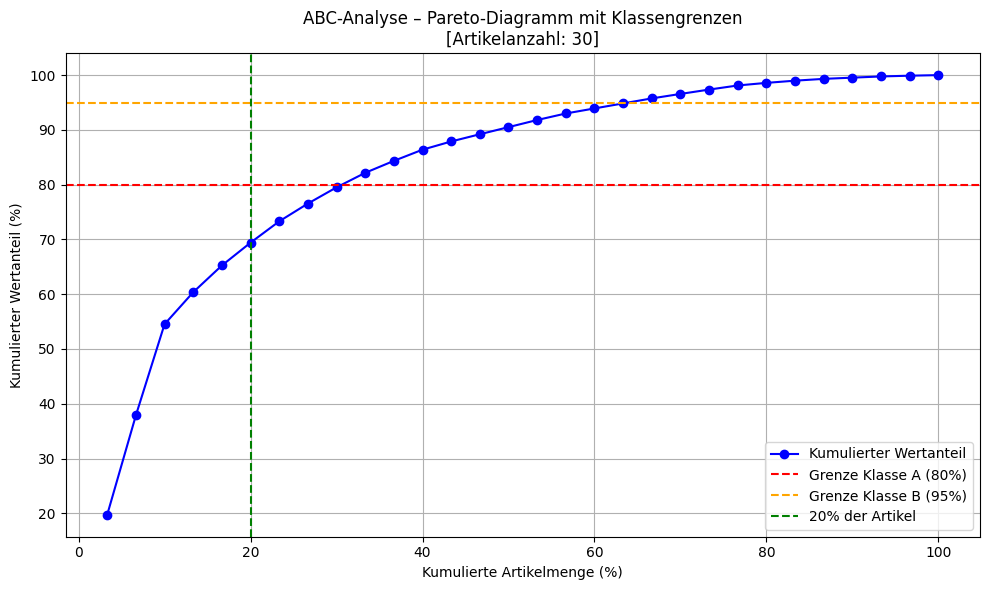

In [104]:
# Visualisierung: Pareto-Diagramm mit Klassengrenzen
plt.figure(figsize=(10, 6))
plt.plot(df["Anteil_Menge"] * 100, df["Kumuliert_Prozent"] * 100, marker='o', label="Kumulierter Wertanteil", color='blue')

# Klassengrenzen als horizontale Linien
plt.axhline(80, color='red', linestyle='--', label='Grenze Klasse A (80%)')
plt.axhline(95, color='orange', linestyle='--', label='Grenze Klasse B (95%)')
plt.axvline(20, color='green', linestyle='--', label='20% der Artikel')

# Achsen und Titel
plt.xlabel("Kumulierte Artikelmenge (%)")
plt.ylabel("Kumulierter Wertanteil (%)")
plt.title(f"ABC-Analyse – Pareto-Diagramm mit Klassengrenzen\n[Artikelanzahl: {n_produkte}]")
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.show()

save_path = f"abc_analyse_pareto_diagramm_artikelanzahl_{n_produkte}.png"
plt.savefig(save_path)
print(f"Das Diagramm wurde gespeichert unter: {save_path}")

# Interpretation

- Die **blaue Kurve** zeigt den kumulierten Anteil am Gesamtwert.
- Die **rote Linie bei 80%** zeigt das Ende der Klasse A.
- Die **orange Linie bei 95%** trennt Klasse B von C.
- Die **grüne Linie bei 20% der Artikel** dient als Orientierung für das Pareto-Prinzip (80/20).

 Die auf Pareto-Verhaltniss basiert ABC-Analysis zeigt, dass eine kleine Anzahl von Artikeln den Großteil des Werts im Lagerbestand ausmacht.
 
 Das ist ein zentrales Prinzip für Bestandsmanagement und Priorisierung in der Logistik.

# Hinweis

Kovertion Jupyter-HTML durch:
```cmd
jupyter nbconvert --to html <file_name>.ipynb --output <flie_name>.html
```